In [2]:
pip install datasets

  Using cached datasets-4.5.0-py3-none-any.whl.metadata (19 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
Using cached datasets-4.5.0-py3-none-any.whl (515 kB)
Using cached dill-0.4.0-py3-none-any.whl (119 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.6 MB/s  0:00:00
Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl (15 kB)
Using cached aiosignal-1.4.0-py3-none-any.whl (7.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 64.7 MB/s  0:00:00 eta 0:00:01


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13/13 [datasets]/13 [datasets]ess]lls]
Note: you may need to restart the kernel to use updated packages.


Match 

COLM2026/annotations/captions_val2017.json

# "image_id" has 5 corresponding "id", for each "id", compare with bounding_box column "objects" on the 

In [3]:
import datasets
from datasets import load_dataset

# Load only validation split (faster, less storage)
val_data = load_dataset("detection-datasets/coco", split="val")

# Iterate through examples
for item in val_data:
    image_id = item['image_id']
    height, width = item['height'], item['width']
    image = item['image']
    annotations = item['objects']

/home/yuexing/miniconda/envs/openai_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating val split: 100%|█████████████████████| 4952/4952 [00:02<00:00, 1912.58 examples/s]


In [5]:
import os
os.getcwd()

'/orcd/home/002/yuexing/COLM2026'

In [15]:
val_data

Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects'],
    num_rows: 4952
})

In [18]:
# Find the item with image_id 397133
for item in val_data:
    if item['image_id'] == 397133:
        print("Found image_id 397133:")
        print(item)
        break

Found image_id 397133:
{'image_id': 397133, 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x427 at 0x145ED3A4A620>, 'width': 640, 'height': 427, 'objects': {'bbox_id': [82445, 119568, 200887, 693231, 713388, 716434, 1125079, 1218137, 1878837, 1883614, 1902250, 1902971, 1914453, 2105658, 2114911, 2114949, 2139366, 2188144, 2196309], 'category': [39, 60, 0, 43, 45, 45, 69, 0, 41, 41, 45, 45, 50, 44, 50, 50, 69, 51, 71], 'bbox': [[217.62, 240.54, 256.61, 298.28999999999996], [1.0, 240.24, 347.63, 427.0], [388.66, 69.92, 498.07000000000005, 347.54], [135.57, 249.43, 157.89, 278.22], [31.28, 344.0, 99.4, 384.83], [59.63, 287.36, 135.7, 328.66], [1.36, 164.33, 193.92000000000002, 262.70000000000005], [0.0, 262.81, 62.16, 299.58], [119.4, 272.51, 144.22, 306.76], [141.47, 267.91, 173.66, 303.77000000000004], [155.97, 168.95, 182.0, 186.07999999999998], [157.2, 114.15, 175.06, 129.97], [98.75, 304.78, 109.53, 310.34999999999997], [166.03, 256.36, 174.85, 274.94], [86.41, 29

In [34]:
import json

# Load instances file to get category mappings
with open('/orcd/home/002/yuexing/COLM2026/annotations/instances_val2017.json', 'r') as f:
    instances_data = json.load(f)

# Create category ID to name mapping
cat_id_to_name = {cat['id']: cat['name'] for cat in instances_data['categories']}

# Check what IDs are available
print("Available category IDs:", sorted(cat_id_to_name.keys()))
print()

# Find the item with image_id 397133
for item in val_data:
    if item['image_id'] == 397133:
        print("Found image_id 397133:")
        print(f"\nCategory IDs: {item['objects']['category']}")
        
        # Convert category IDs to names (with error handling)
        category_names = []
        for cat_id in item['objects']['category']:
            if cat_id in cat_id_to_name:
                category_names.append(cat_id_to_name[cat_id])
            else:
                category_names.append(f"Unknown (ID: {cat_id})")
        
        print(f"\nCategory Names: {category_names}")
        
        # Print them nicely paired
        print("\nCategory ID → Name:")
        for cat_id in item['objects']['category']:
            name = cat_id_to_name.get(cat_id, f"Unknown (ID: {cat_id})")
            print(f"  {cat_id} → {name}")
        
        break

Available category IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]

Found image_id 397133:

Category IDs: [39, 60, 0, 43, 45, 45, 69, 0, 41, 41, 45, 45, 50, 44, 50, 50, 69, 51, 71]

Category Names: ['baseball bat', 'donut', 'Unknown (ID: 0)', 'tennis racket', 'Unknown (ID: 45)', 'Unknown (ID: 45)', 'Unknown (ID: 69)', 'Unknown (ID: 0)', 'skateboard', 'skateboard', 'Unknown (ID: 45)', 'Unknown (ID: 45)', 'spoon', 'bottle', 'spoon', 'spoon', 'Unknown (ID: 69)', 'bowl', 'Unknown (ID: 71)']

Category ID → Name:
  39 → baseball bat
  60 → donut
  0 → Unknown (ID: 0)
  43 → tennis racket
  45 → Unknown (ID: 45)
  45 → Unknown (ID: 45)
  69 → Unknown (ID: 69)
  0 → Unknown (ID: 0)
  41 → skateboard
  41 → skateboard
  45 → Unkno

In [22]:
import json

# Load instances file (contains category definitions)
with open('/orcd/home/002/yuexing/COLM2026/annotations/instances_val2017.json', 'r') as f:
    instances_data = json.load(f)

# Get categories
categories = instances_data['categories']

# Print all categories
print("COCO Categories:\n")
for cat in categories:
    print(f"ID {cat['id']}: {cat['name']} (supercategory: {cat['supercategory']})")

COCO Categories:

ID 1: person (supercategory: person)
ID 2: bicycle (supercategory: vehicle)
ID 3: car (supercategory: vehicle)
ID 4: motorcycle (supercategory: vehicle)
ID 5: airplane (supercategory: vehicle)
ID 6: bus (supercategory: vehicle)
ID 7: train (supercategory: vehicle)
ID 8: truck (supercategory: vehicle)
ID 9: boat (supercategory: vehicle)
ID 10: traffic light (supercategory: outdoor)
ID 11: fire hydrant (supercategory: outdoor)
ID 13: stop sign (supercategory: outdoor)
ID 14: parking meter (supercategory: outdoor)
ID 15: bench (supercategory: outdoor)
ID 16: bird (supercategory: animal)
ID 17: cat (supercategory: animal)
ID 18: dog (supercategory: animal)
ID 19: horse (supercategory: animal)
ID 20: sheep (supercategory: animal)
ID 21: cow (supercategory: animal)
ID 22: elephant (supercategory: animal)
ID 23: bear (supercategory: animal)
ID 24: zebra (supercategory: animal)
ID 25: giraffe (supercategory: animal)
ID 27: backpack (supercategory: accessory)
ID 28: umbrella (

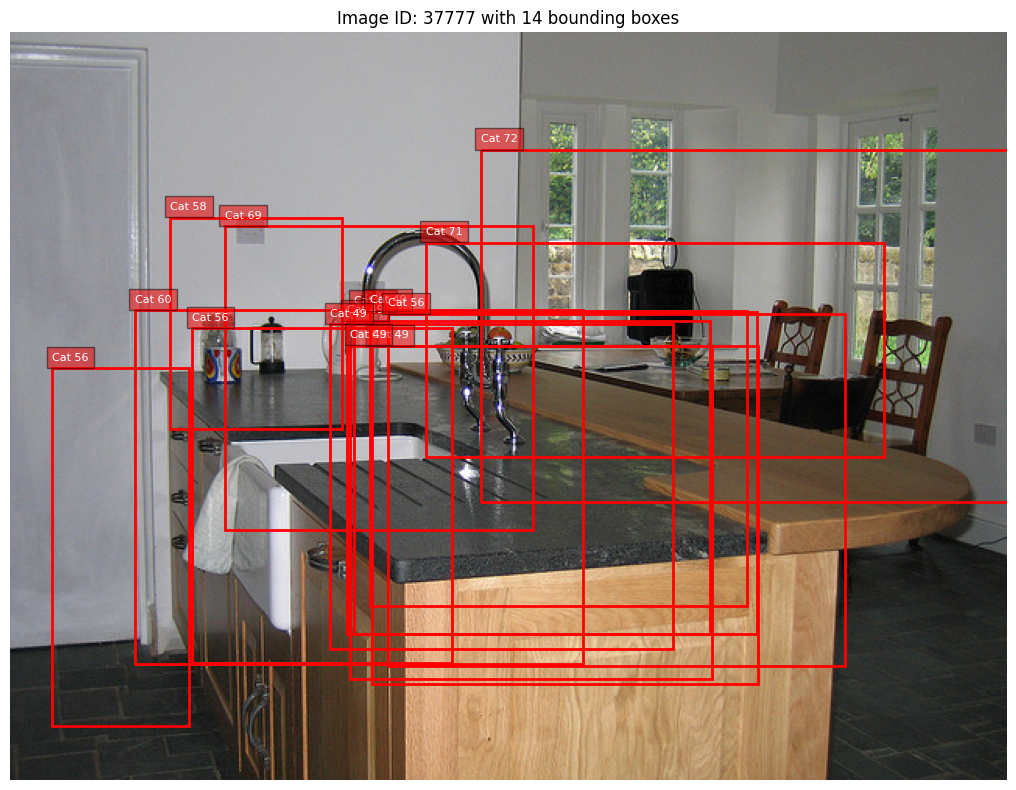

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load your image (adjust path as needed)
img_path = '/orcd/home/002/yuexing/COLM2026/val2017/000000034873.jpg'  # Update with your actual path
img = Image.open(img_path)

# Get the item data (you already have this)
image_id = 37777
item = None
for data in val_data:
    if data['image_id'] == image_id:
        item = data
        break

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img)

# Draw all bounding boxes
bboxes = item['objects']['bbox']
categories = item['objects']['category']

for i, bbox in enumerate(bboxes):
    x, y, width, height = bbox
    
    # Create rectangle patch
    rect = patches.Rectangle(
        (x, y), width, height,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    
    # Add rectangle to plot
    ax.add_patch(rect)
    
    # Add category label
    ax.text(x, y-5, f'Cat {categories[i]}', 
            color='white', fontsize=8,
            bbox=dict(facecolor='red', alpha=0.5))

ax.axis('off')
plt.title(f'Image ID: {image_id} with {len(bboxes)} bounding boxes')
plt.tight_layout()
plt.show()

In [30]:
import json

# Load the JSON file
with open('/orcd/home/002/yuexing/COLM2026/annotations/captions_val2017.json', 'r') as f:
    coco_data = json.load(f)

# See the top-level keys
print("Top-level keys:", coco_data.keys())
# Output: dict_keys(['info', 'licenses', 'images', 'annotations'])

# Check dataset info
print("\nDataset info:")
print(coco_data['info'])

# Check how many images and annotations
print(f"\nNumber of images: {len(coco_data['images'])}")
print(f"Number of annotations: {len(coco_data['annotations'])}")

# Look at first image entry
print("\nFirst image:")
print(coco_data['images'][133])

Top-level keys: dict_keys(['info', 'licenses', 'images', 'annotations'])

Dataset info:
{'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}

Number of images: 5000
Number of annotations: 25014

First image:
{'license': 4, 'file_name': '000000034873.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000034873.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 19:53:59', 'flickr_url': 'http://farm3.staticflickr.com/2563/3822818427_389d99073f_z.jpg', 'id': 34873}


In [31]:
# Get the first image's ID
first_image_id = coco_data['images'][133]['id']

# Get all captions for this image
captions = [ann['caption'] for ann in coco_data['annotations'] 
            if ann['image_id'] == first_image_id]

# Print them
print(f"Image ID: {first_image_id}")
print(f"Filename: {coco_data['images'][133]['file_name']}")
print(f"\nCaptions ({len(captions)}):")
for i, caption in enumerate(captions, 1):
    print(f"{i}. {caption}")

Image ID: 34873
Filename: 000000034873.jpg

Captions (5):
1. A kitchen with a counter and a table with chairs.
2. A large dining room features wooden cabinets and a marble counter top.
3. a black counter a sink and a table and two chairs
4. A kitchen island has a farmhouse sink on it.
5. A sink in a peninsula in a kitchen.
